In [1]:
# IMPORT LIBRARIES AND LOAD DATA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

data = pd.read_csv(r'C:\Users\Sanskruti Diyewar\OneDrive\Desktop\Project Data Analyis\Data.csv')
data

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [2]:
# DATA PREPROCESSING
# Check for missing values
data.isnull().sum()

# Encode categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'Churn':
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

# Encode the target variable
data['Churn'] = LabelEncoder().fit_transform(data['Churn'])

# Split data into features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
# DATA MODELLING
# Train Logistic Regression model
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression model
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

print("Logistic Regression Accuracy: {:.2f}%".format(log_reg_acc * 100))
print("Logistic Regression ROC AUC: {:.2f}".format(log_reg_roc_auc))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 80.61%
Logistic Regression ROC AUC: 0.85
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1012
           1       0.69      0.56      0.62       391

    accuracy                           0.81      1403
   macro avg       0.76      0.73      0.74      1403
weighted avg       0.80      0.81      0.80      1403



In [4]:
# DECISION TREE
# Train Decision Tree model
dec_tree = DecisionTreeClassifier(random_state=0)
dec_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_dec_tree = dec_tree.predict(X_test)

# Evaluate Decision Tree model
dec_tree_acc = accuracy_score(y_test, y_pred_dec_tree)
dec_tree_roc_auc = roc_auc_score(y_test, dec_tree.predict_proba(X_test)[:, 1])

print("Decision Tree Accuracy: {:.2f}%".format(dec_tree_acc * 100))
print("Decision Tree ROC AUC: {:.2f}".format(dec_tree_roc_auc))
print(classification_report(y_test, y_pred_dec_tree))

Decision Tree Accuracy: 71.85%
Decision Tree ROC AUC: 0.66
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1012
           1       0.50      0.53      0.51       391

    accuracy                           0.72      1403
   macro avg       0.65      0.66      0.66      1403
weighted avg       0.73      0.72      0.72      1403



In [5]:
# RANDOM FOREST
# Train Random Forest model
rand_forest = RandomForestClassifier(n_estimators=100, random_state=0)
rand_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rand_forest = rand_forest.predict(X_test)

# Evaluate Random Forest model
rand_forest_acc = accuracy_score(y_test, y_pred_rand_forest)
rand_forest_roc_auc = roc_auc_score(y_test, rand_forest.predict_proba(X_test)[:, 1])

print("Random Forest Accuracy: {:.2f}%".format(rand_forest_acc * 100))
print("Random Forest ROC AUC: {:.2f}".format(rand_forest_roc_auc))
print(classification_report(y_test, y_pred_rand_forest))

Random Forest Accuracy: 79.83%
Random Forest ROC AUC: 0.84
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1012
           1       0.68      0.53      0.59       391

    accuracy                           0.80      1403
   macro avg       0.75      0.72      0.73      1403
weighted avg       0.79      0.80      0.79      1403



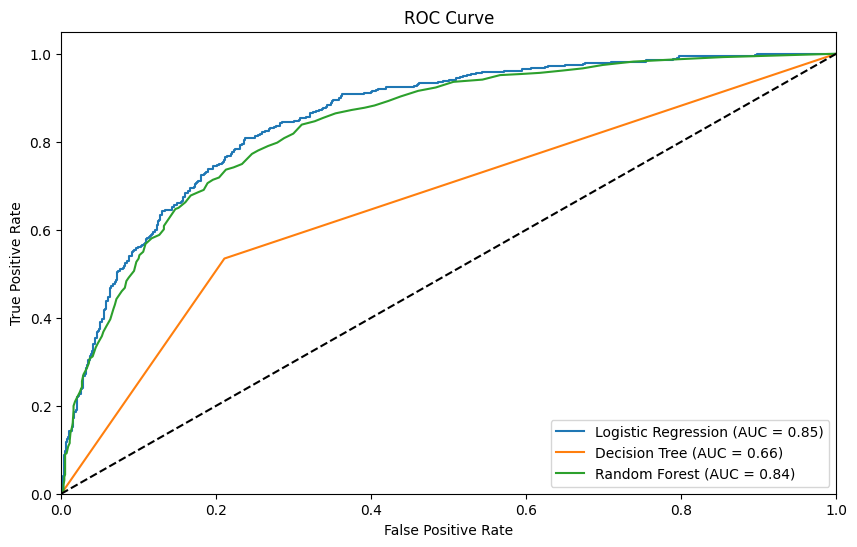

In [6]:
# MODEL EVALUATION AND VISUALIZATION
# Plot ROC curves
plt.figure(figsize=(10, 6))

models = [('Logistic Regression', log_reg), 
          ('Decision Tree', dec_tree), 
          ('Random Forest', rand_forest)]

for model_name, model in models:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()